<a href="https://colab.research.google.com/github/talentflameX/HVAC-Anomaly-Detection/blob/main/HAVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving HVAC_dataset.csv to HVAC_dataset (1).csv
Dataset Sample:


,Date,on_off,damper,active_energy,co2_1,amb_humid_1,active_power,pot_gen,high_pressure_1,high_pressure_2,low_pressure_1,low_pressure_2,high_pressure_3,low_pressure_3,outside_temp,outlet_temp,inlet_temp,summer_setpoint_temp,winter_setpoint_temp,amb_temp_2
0,01/06/22 00:00,0.0,0.0,363150.69,975.0,35.0,0.36,4.0,15.09,15.0,15.27,15.1,15.2,15.2,23.4,24.2,22.8,22.5,18.0,23.4
1,01/06/22 00:05,0.0,0.0,NaN,977.0,35.0,0.36,NaN,15.03,14.9,15.21,15.0,15.2,15.1,23.3,24.2,22.7,22.5,18.0,23.3
2,01/06/22 00:10,0.0,0.0,NaN,975.0,35.0,0.36,NaN,15.03,14.8,15.15,15.0,15.1,15.1,23.1,24.1,22.5,22.5,18.0,23.4
3,01/06/22 00:15,0.0,0.0,363150.78,975.0,35.0,0.36,4.0,14.96,14.8,15.15,14.9,15.1,15.0,23.1,23.9,22.3,22.5,18.0,23.3
4,01/06/22 00:20,0.0,0.0,NaN,975.0,35.0,0.36,NaN,14.90,14.7,15.09,14.9,15.0,14.9,22.9,23.9,22.2,22.5,18.0,23.3



Missing Values:
Date                        0
on_off                     75
damper                     77
active_energy           17114
co2_1                      78
amb_humid_1               336
active_power               71
pot_gen                 17088
high_pressure_1            79
high_pressure_2            76
low_pressure_1             79
low_pressure_2             76
high_pressure_3            76
low_pressure_3             76
outside_temp               77
outlet_temp                76
inlet_temp                 75
summer_setpoint_temp       76
winter_setpoint_temp       77
amb_temp_2                142
dtype: int64


<ipython-input-14-03f719411d25>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Ensure correct format



Data Types:
Date                    datetime64[ns]
on_off                         float64
damper                         float64
active_energy                  float64
co2_1                          float64
amb_humid_1                    float64
active_power                   float64
pot_gen                        float64
high_pressure_1                float64
high_pressure_2                float64
low_pressure_1                 float64
low_pressure_2                 float64
high_pressure_3                float64
low_pressure_3                 float64
outside_temp                   float64
outlet_temp                    float64
inlet_temp                     float64
summer_setpoint_temp           float64
winter_setpoint_temp           float64
amb_temp_2                     float64
dtype: object

High Pressure Sensor Statistics:
       high_pressure_1  high_pressure_2
count     25553.000000     25556.000000
mean         19.287211        19.251600
std           5.734787         5.521055

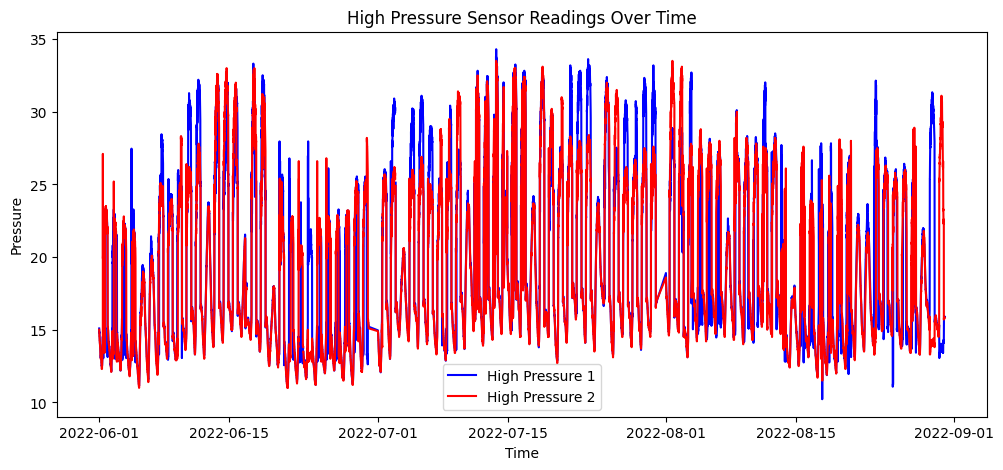

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

# Assuming it's a CSV file
filename = list(uploaded.keys())[0]  # Get uploaded file name
df = pd.read_csv(filename)

# Display first few rows
print("Dataset Sample:")
display(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Ensure correct format

# Check data types
print("\nData Types:")
print(df.dtypes)

# Basic statistics of high pressure
print("\nHigh Pressure Sensor Statistics:")
print(df[['high_pressure_1', 'high_pressure_2']].describe())

# Plot high pressure over time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['high_pressure_1'], label='High Pressure 1', color='blue')
plt.plot(df['Date'], df['high_pressure_2'], label='High Pressure 2', color='red')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('High Pressure Sensor Readings Over Time')
plt.legend()
plt.show()


In [15]:
# Fill missing values (if any) with the median of each column
df.fillna(df.median(), inplace=True)

# Confirm missing values are handled
print("\nMissing Values After Filling:")
print(df.isnull().sum())



Missing Values After Filling:
Date                    0
on_off                  0
damper                  0
active_energy           0
co2_1                   0
amb_humid_1             0
active_power            0
pot_gen                 0
high_pressure_1         0
high_pressure_2         0
low_pressure_1          0
low_pressure_2          0
high_pressure_3         0
low_pressure_3          0
outside_temp            0
outlet_temp             0
inlet_temp              0
summer_setpoint_temp    0
winter_setpoint_temp    0
amb_temp_2              0
dtype: int64


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
sensor_columns = ['high_pressure_1', 'high_pressure_2']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Show transformed values
print("\nNormalized Sensor Values:")
display(df.head())



Normalized Sensor Values:


,Date,on_off,damper,active_energy,co2_1,amb_humid_1,active_power,pot_gen,high_pressure_1,high_pressure_2,low_pressure_1,low_pressure_2,high_pressure_3,low_pressure_3,outside_temp,outlet_temp,inlet_temp,summer_setpoint_temp,winter_setpoint_temp,amb_temp_2
0,2022-06-01 00:00:00,0.0,0.0,363150.69,975.0,35.0,0.36,4.0,0.202243,0.177778,15.27,15.1,15.2,15.2,23.4,24.2,22.8,22.5,18.0,23.4
1,2022-06-01 00:05:00,0.0,0.0,377963.36,977.0,35.0,0.36,6.0,0.199751,0.173333,15.21,15.0,15.2,15.1,23.3,24.2,22.7,22.5,18.0,23.3
2,2022-06-01 00:10:00,0.0,0.0,377963.36,975.0,35.0,0.36,6.0,0.199751,0.168889,15.15,15.0,15.1,15.1,23.1,24.1,22.5,22.5,18.0,23.4
3,2022-06-01 00:15:00,0.0,0.0,363150.78,975.0,35.0,0.36,4.0,0.196844,0.168889,15.15,14.9,15.1,15.0,23.1,23.9,22.3,22.5,18.0,23.3
4,2022-06-01 00:20:00,0.0,0.0,377963.36,975.0,35.0,0.36,6.0,0.194352,0.164444,15.09,14.9,15.0,14.9,22.9,23.9,22.2,22.5,18.0,23.3


anomaly
Normal     24351
Anomaly     1281
Name: count, dtype: int64


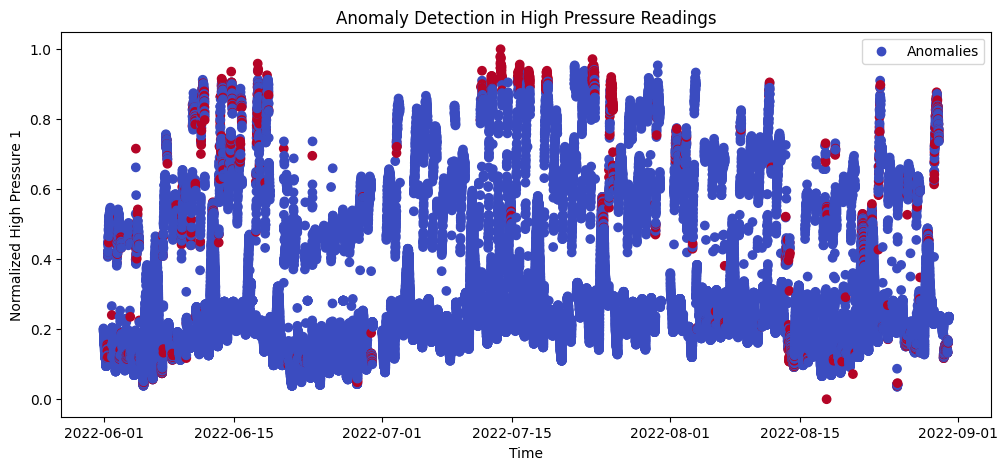

In [26]:
from sklearn.ensemble import IsolationForest

# Select relevant sensor data
sensor_columns = ["active_energy", "co2_1", "amb_humid_1", "active_power", "high_pressure_1", "high_pressure_2"]
X = df[sensor_columns]

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = iso_forest.fit_predict(X)

# Convert -1 to 'Anomaly', 1 to 'Normal'
df["anomaly"] = df["anomaly"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Debug: Check anomaly counts
print(df["anomaly"].value_counts())

# Visualize anomalies
plt.figure(figsize=(12, 5))
plt.scatter(df['Date'], df['high_pressure_1'], c=(df['anomaly'] == 'Anomaly'), cmap='coolwarm', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Normalized High Pressure 1')
plt.title('Anomaly Detection in High Pressure Readings')
plt.legend()
plt.show()


# Task
Tell me about this dataset.

Here is all the data you need:
"HVAC_dataset.csv"

## Data loading

### Subtask:
Load the HVAC dataset into a Pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame.



In [19]:
!pip install gradio plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import plotly.express as px
import gradio as gr
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load dataset (replace with actual dataset path if needed)
# df = pd.read_csv("your_dataset.csv")

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select relevant sensor data
sensor_columns = ["active_energy", "co2_1", "amb_humid_1", "active_power", "high_pressure_1", "high_pressure_2"]
X = df[sensor_columns]

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = iso_forest.fit_predict(X)

# Convert -1 to 'Anomaly', 1 to 'Normal'
df["anomaly"] = df["anomaly"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Debug: Check anomaly counts
print(df["anomaly"].value_counts())

# Generate maintenance alert messages
df['maintenance_alert'] = df.apply(
    lambda row: f"⚠️ Alert: {row['Date']} - High pressure ({row['high_pressure_1']} bar). Check HVAC system!"
    if row['anomaly'] == "Anomaly" else "✅ Normal Operation", axis=1
)

# Define dashboard function
def dashboard(sensor):
    if sensor not in df.columns:
        return None, "⚠️ Error: Selected sensor data not found."

    fig = px.line(df, x="Date", y=sensor, title=f"{sensor} Over Time", color=df['anomaly'])

    anomalies = df[df['anomaly'] == "Anomaly"]  # Ensure proper filtering

    if anomalies.empty:
        alert_messages = "✅ No anomalies detected."
    else:
        alert_messages = anomalies[['Date', 'maintenance_alert']].to_string(index=False)

    return fig, alert_messages

# Define Gradio UI
sensor_list = ["active_energy", "co2_1", "amb_humid_1", "active_power", "high_pressure_1", "high_pressure_2"]
interface = gr.Interface(
    fn=dashboard,
    inputs=gr.Dropdown(choices=sensor_list, label="Select Sensor"),
    outputs=[gr.Plot(label="Sensor Data"), gr.Textbox(label="Maintenance Alerts")],
    title="HVAC Anomaly Detection Dashboard",
    description="View sensor data trends and get real-time maintenance alerts for HVAC systems."
)

# Launch dashboard
interface.launch(share=True, debug=True)


# Visualize anomalies
plt.figure(figsize=(12, 5))
plt.scatter(df['Date'], df['high_pressure_1'], c=(df['anomaly'] == 'Anomaly'), cmap='coolwarm', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('High Pressure 1')
plt.title('Anomaly Detection in High Pressure Readings')
plt.legend()
plt.show()



anomaly
Normal     24351
Anomaly     1281
Name: count, dtype: int64
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5c4955d8b98e1ca937.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [23]:
print(df["anomaly"].unique())
print(df[df['anomaly'] == 'Anomaly'].head())


['Normal']
Empty DataFrame
Columns: [Date, on_off, damper, active_energy, co2_1, amb_humid_1, active_power, pot_gen, high_pressure_1, high_pressure_2, low_pressure_1, low_pressure_2, high_pressure_3, low_pressure_3, outside_temp, outlet_temp, inlet_temp, summer_setpoint_temp, winter_setpoint_temp, amb_temp_2, anomaly, maintenance_alert]
Index: []

[0 rows x 22 columns]


**Reasoning**:
Investigate potential outliers in the numerical features using boxplots.



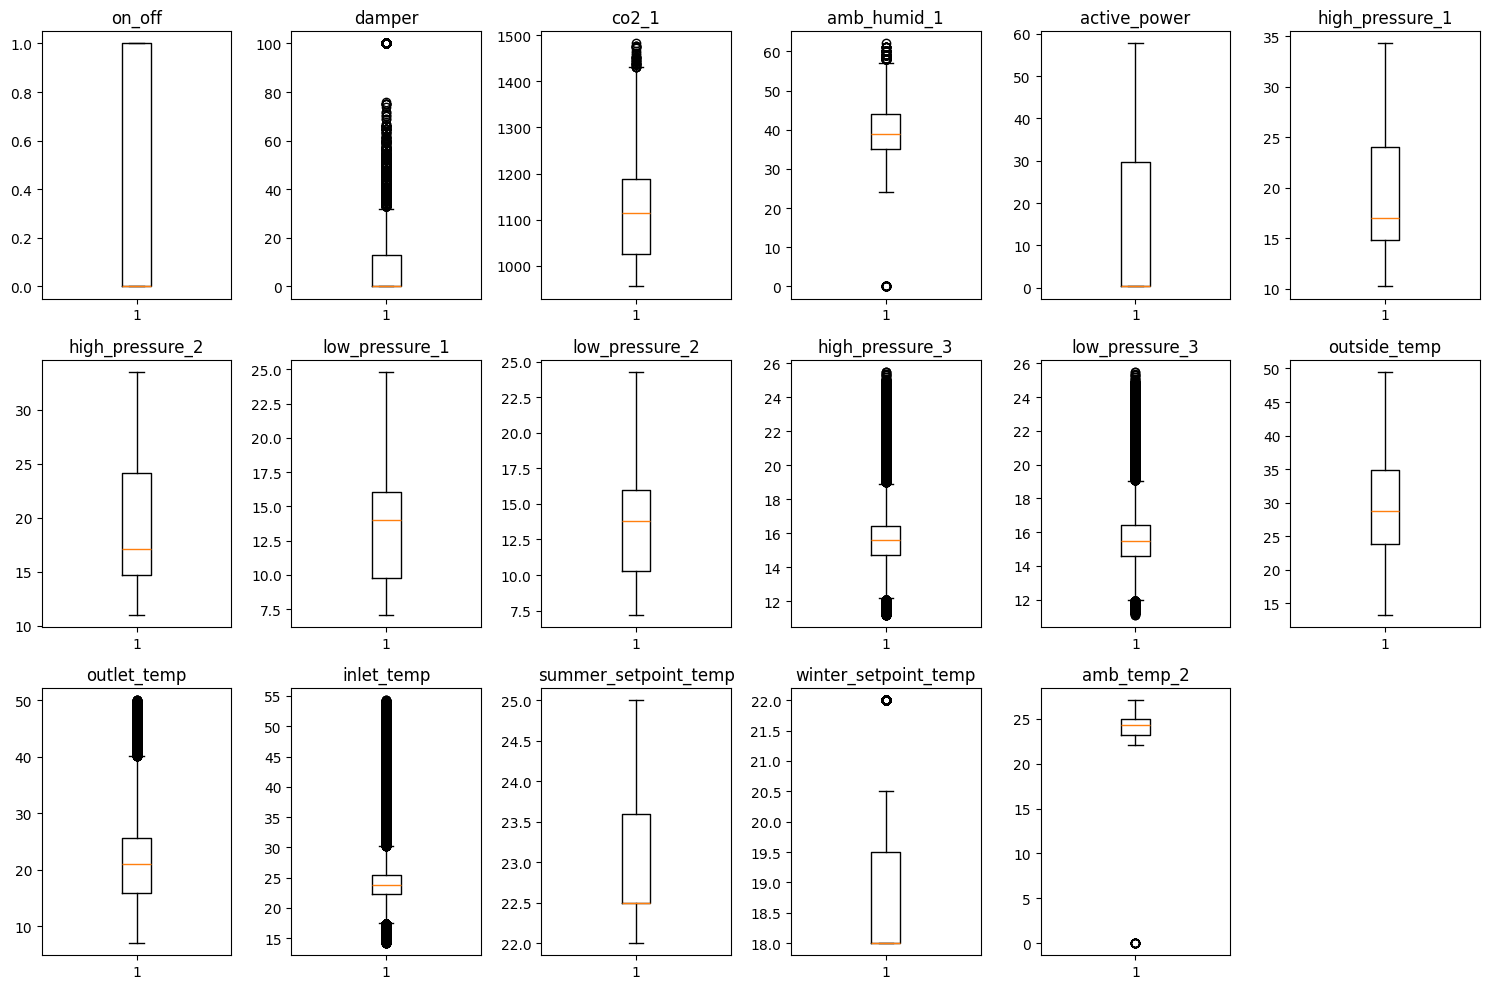

In [4]:
import matplotlib.pyplot as plt

# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols):
    plt.subplot(3, 6, i + 1)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

**Reasoning**:
Convert the 'Date' column to datetime objects and extract year, month, day, and hour as new features.



In [5]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y %H:%M')

# Extract year, month, day, and hour
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour

**Reasoning**:
Create features related to time of day (morning, afternoon, evening, night).



In [6]:
# Create features related to time of day
def get_time_of_day(hour):
  if 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 18:
    return 'Afternoon'
  elif 18 <= hour < 22:
    return 'Evening'
  else:
    return 'Night'

df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)

**Reasoning**:
Encode the categorical variable 'TimeOfDay' using one-hot encoding.



In [7]:
# One-hot encode 'TimeOfDay'
time_of_day_encoded = pd.get_dummies(df['TimeOfDay'], prefix='TimeOfDay')
df = pd.concat([df, time_of_day_encoded], axis=1)

**Reasoning**:
Create features that capture the difference between temperatures, pressures, and other numerical features.



In [8]:
# Calculate temperature differences
df['TempDifference_OutletInlet'] = df['outlet_temp'] - df['inlet_temp']
df['TempDifference_OutsideInlet'] = df['outside_temp'] - df['inlet_temp']

# Calculate pressure differences
df['PressureDifference_HighLow_1'] = df['high_pressure_1'] - df['low_pressure_1']
df['PressureDifference_HighLow_2'] = df['high_pressure_2'] - df['low_pressure_2']
df['PressureDifference_HighLow_3'] = df['high_pressure_3'] - df['low_pressure_3']

**Reasoning**:
Calculate the correlation matrix for numerical variables and visualize it using a heatmap to identify potential correlations between energy consumption and other factors.



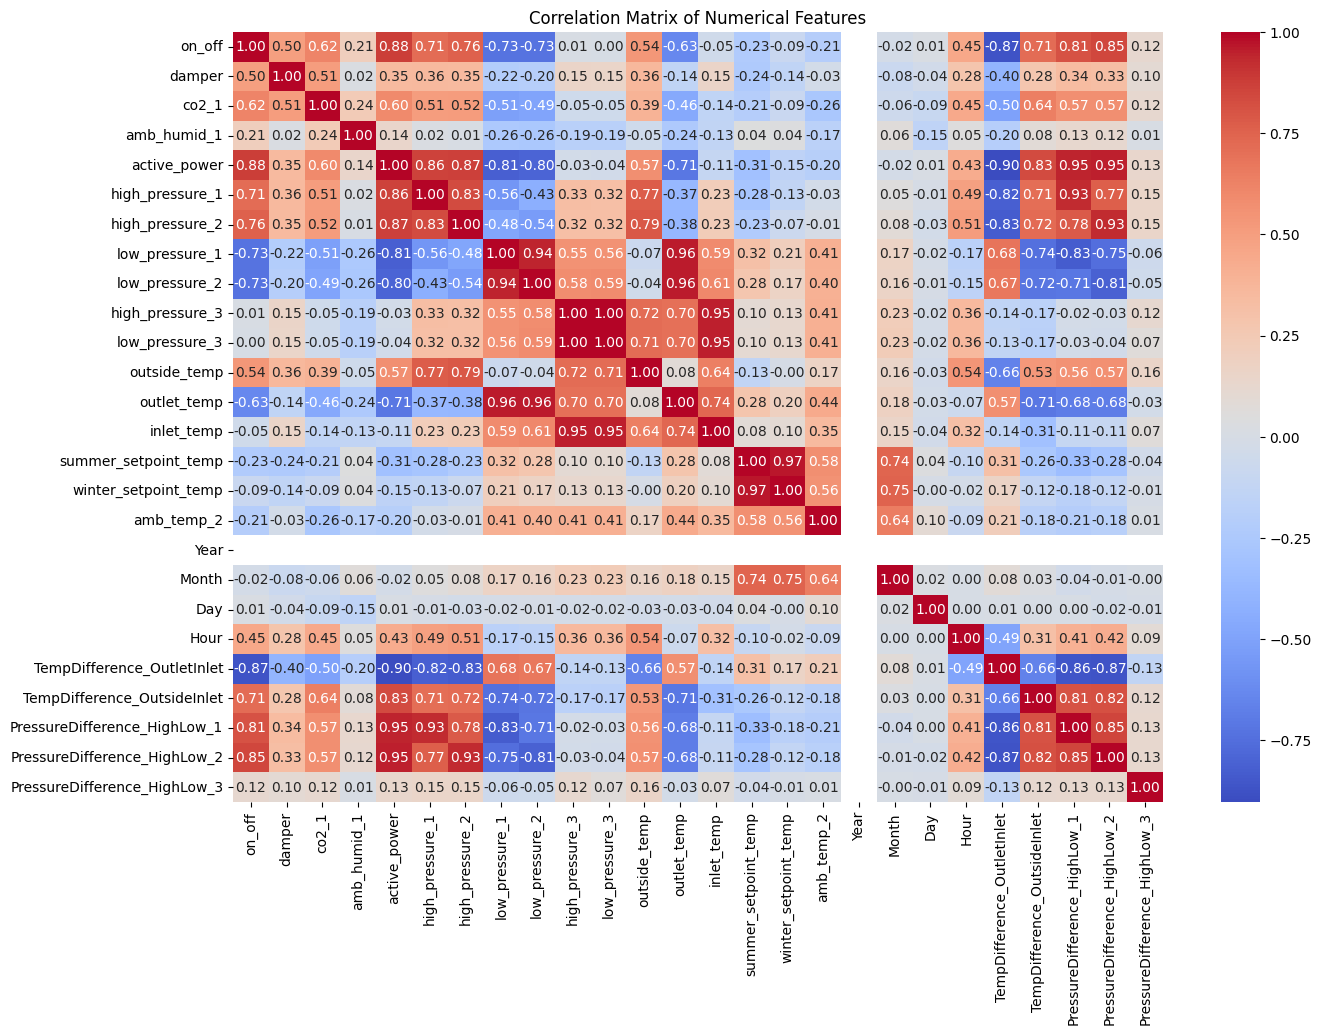

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Based on the heatmap, identify potential correlations between energy consumption and other factors. Then, generate scatter plots to further investigate these relationships and analyze the distributions of relevant variables using histograms or box plots.



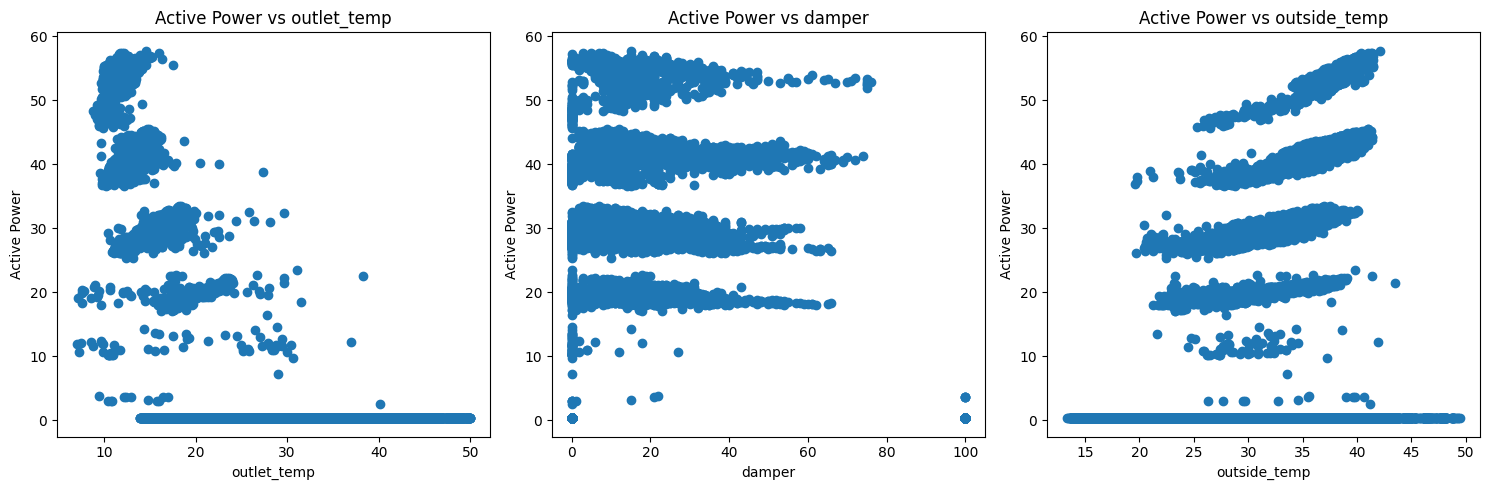

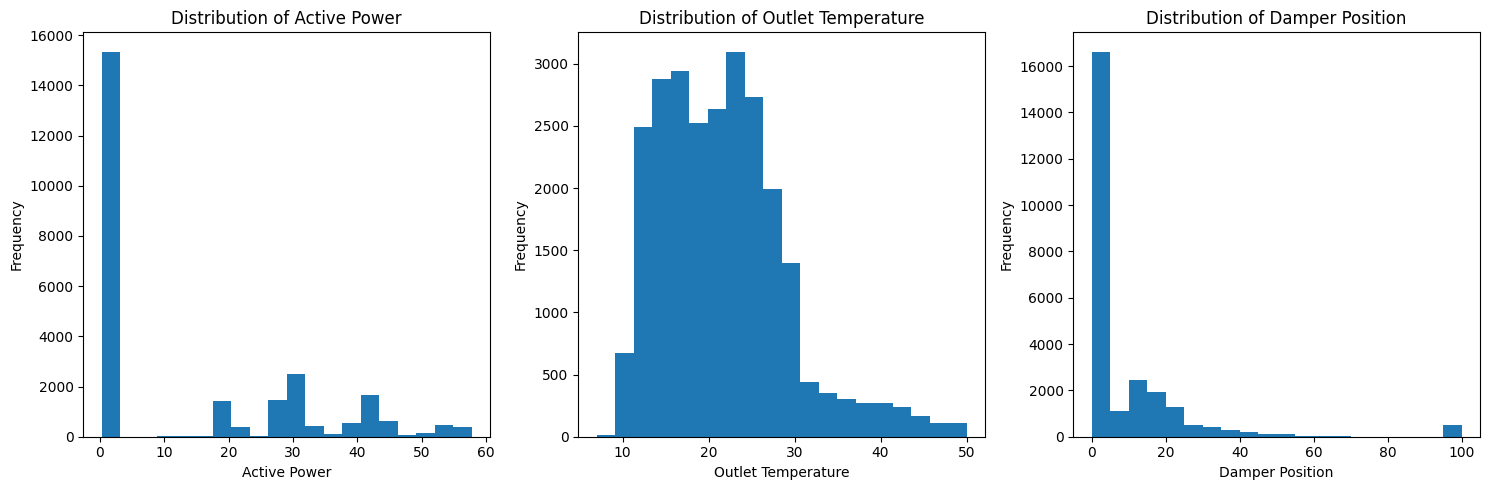

In [10]:
import matplotlib.pyplot as plt

# Identify potential correlations from the heatmap (e.g., active_power with outlet_temp, damper, outside_temp)
potential_factors = ['outlet_temp', 'damper', 'outside_temp']

# Generate scatter plots to further investigate the relationships
plt.figure(figsize=(15, 5))
for i, factor in enumerate(potential_factors):
  plt.subplot(1, len(potential_factors), i + 1)
  plt.scatter(df[factor], df['active_power'])
  plt.xlabel(factor)
  plt.ylabel('Active Power')
  plt.title(f'Active Power vs {factor}')

plt.tight_layout()
plt.show()

# Analyze the distributions of relevant variables using histograms or box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['active_power'], bins=20)
plt.xlabel('Active Power')
plt.ylabel('Frequency')
plt.title('Distribution of Active Power')

plt.subplot(1, 3, 2)
plt.hist(df['outlet_temp'], bins=20)
plt.xlabel('Outlet Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Outlet Temperature')

plt.subplot(1, 3, 3)
plt.hist(df['damper'], bins=20)
plt.xlabel('Damper Position')
plt.ylabel('Frequency')
plt.title('Distribution of Damper Position')

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the active power consumption over time using a line chart.



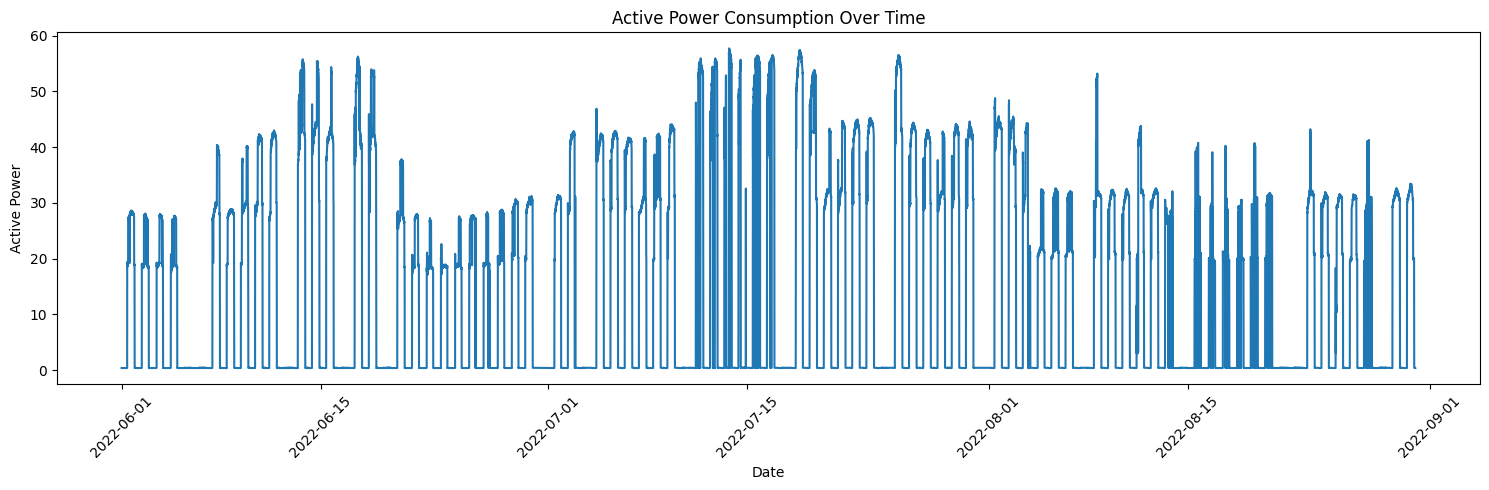

In [11]:
import matplotlib.pyplot as plt

# Plot active power consumption over time
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['active_power'])
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.title('Active Power Consumption Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the active power consumption by time of day using a bar chart.



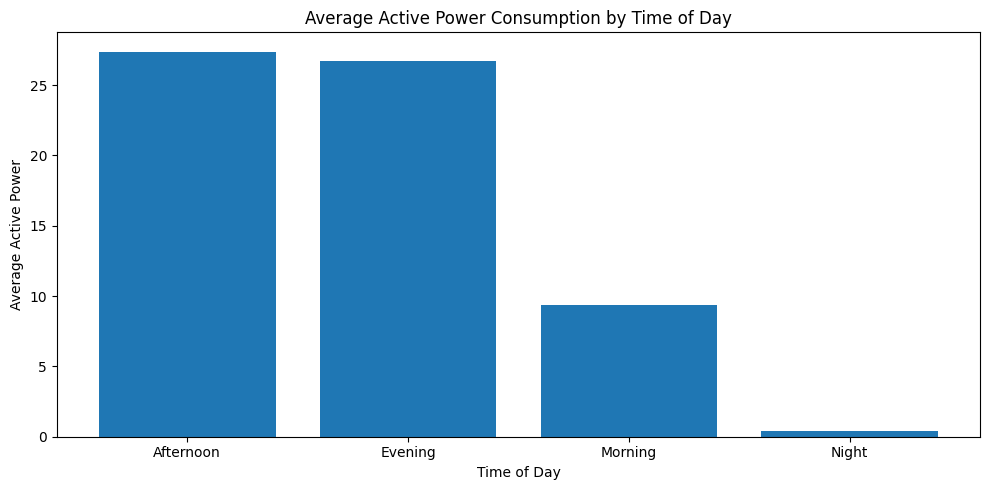

In [12]:
import matplotlib.pyplot as plt

# Group by 'TimeOfDay' and calculate the mean active power
average_active_power_by_time_of_day = df.groupby('TimeOfDay')['active_power'].mean()

# Create a bar chart to visualize the average active power consumption for each time of day
plt.figure(figsize=(10, 5))
plt.bar(average_active_power_by_time_of_day.index, average_active_power_by_time_of_day.values)
plt.xlabel('Time of Day')
plt.ylabel('Average Active Power')
plt.title('Average Active Power Consumption by Time of Day')
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the distribution of active power, outlet temperature, damper position, and outside temperature using histograms.



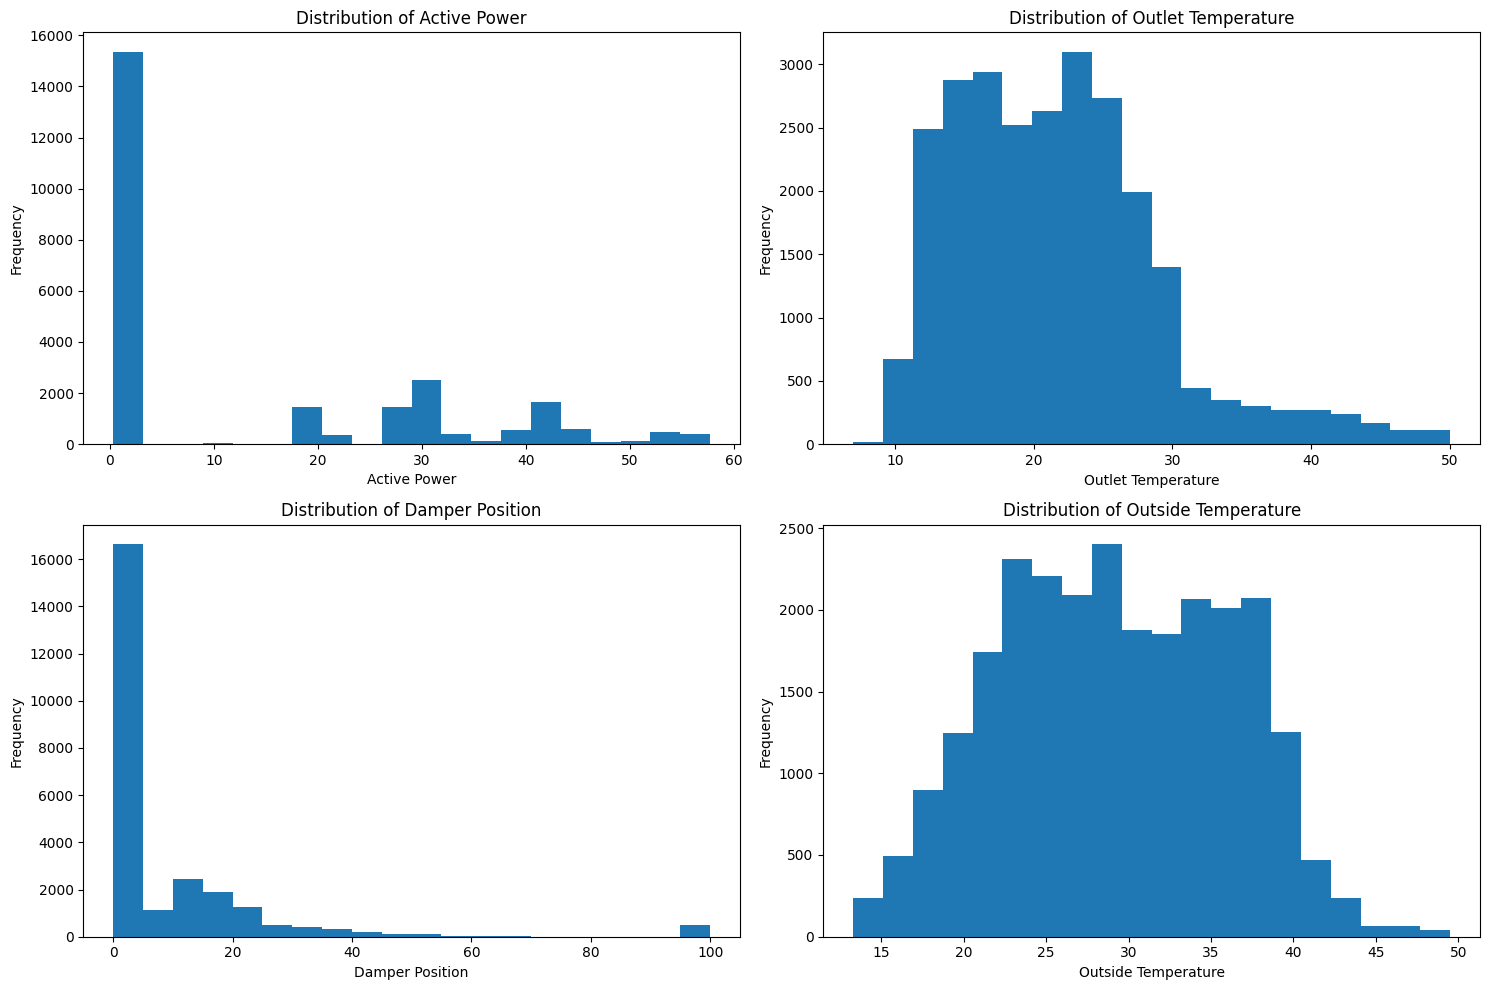

In [13]:
import matplotlib.pyplot as plt

# Create histograms for active power, outlet temperature, damper position, and outside temperature
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df['active_power'], bins=20)
plt.xlabel('Active Power')
plt.ylabel('Frequency')
plt.title('Distribution of Active Power')

plt.subplot(2, 2, 2)
plt.hist(df['outlet_temp'], bins=20)
plt.xlabel('Outlet Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Outlet Temperature')

plt.subplot(2, 2, 3)
plt.hist(df['damper'], bins=20)
plt.xlabel('Damper Position')
plt.ylabel('Frequency')
plt.title('Distribution of Damper Position')

plt.subplot(2, 2, 4)
plt.hist(df['outside_temp'], bins=20)
plt.xlabel('Outside Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Outside Temperature')

plt.tight_layout()
plt.show()